# Introduction

For this analysis project, I am taking the viewpoint from the perspective of consulting with a potential bookstore owner. The client has an interest in opening a new bookstore, but before finalizing her plans, she wishes to better understand what types of books she should stock her store with. Understanding that it is not feasible to stock every book ever published in her store, I will utilize the Books Sales and Ratings dataset (https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings?resource=download) to provide recommendations for the types of books I think would result in her selling the most.

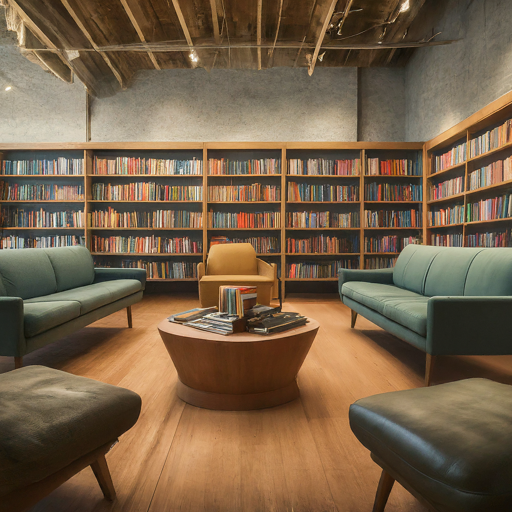
<center>Image generated using Google Gemini.<center>

## Questions and Considerations
- What factors result in generating the most income?
- Using those factors, can we make recommendations for particular types of books to stock in the store?

- Only want to start with selling books in English (in the future will look to expand to other languages)
- Remember, interested in income, not necessarily number of sales 

## Loading

In [1]:
# First the library(s)
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# Next the dataset
data = pd.read_csv('Books_Data_Clean.csv')

## Familiarization with the dataset

In [3]:
data.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


Important Information: \
Book_average_rating is the average rating given by readers \
Book_ratings_count is the number of readers who rated that book \
'gross sales' refers to total revenue generated by sales of the book \
'publisher revenue' refers to the total revenue earned by the publisher of the book

In [4]:
# First summarizing the dataset
data.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [5]:
# Now we'll take a look at some of the categorical variables
# Starting with the Author_Rating
data["Author_Rating"].unique()

array(['Novice', 'Intermediate', 'Famous', 'Excellent'], dtype=object)

In [6]:
# Next the genre
data["genre"].unique()

array(['genre fiction', 'fiction', 'nonfiction', 'children'], dtype=object)

To address these issues: \
It looks like there are two labels corresponding to 'fiction', so we'll have to address that during our cleaning steps.

In [7]:
# Let's investigate the potential presence of null or NaN values
count_null = data.isna().sum()
print('Number of null or NaN values', count_null)

Number of null or NaN values index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64


To address these issues: \
We can attempt to use a brute, manual approach to filling in the single missing Publishing Year value if we know the Book Name because that will be simple enough to look up and update. However, for the missing Book Name and language_code, let's just exclude these instances for now. Future analayses may consider incorporating additional data frames which would make this process of updating/correcting easier.

In [8]:
data[data['Publishing Year'].isna()]

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
445,445,NaN,NaN,"Robert Kapilow, Dr. Seuss",NaN,Famous,4.44,90574,nonfiction,532.22,319.332,2.99,493,Hachette Book Group,4806


Observation: Okay it seems that the Book Name is also missing for this entry, so we'll just exclude it.

## Data Vizualizations

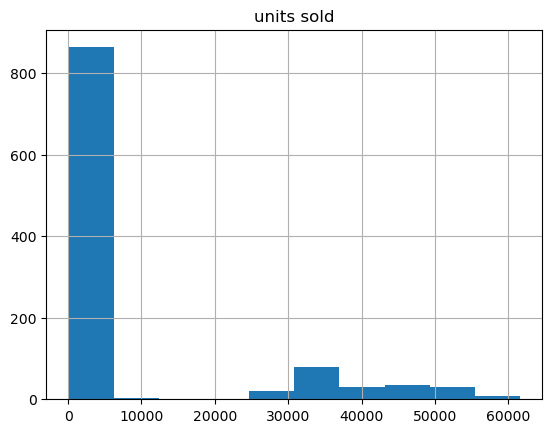

In [9]:
## Our outcome variable
# Visualize the distribution of units sold
data.hist('units sold')
plt.show()

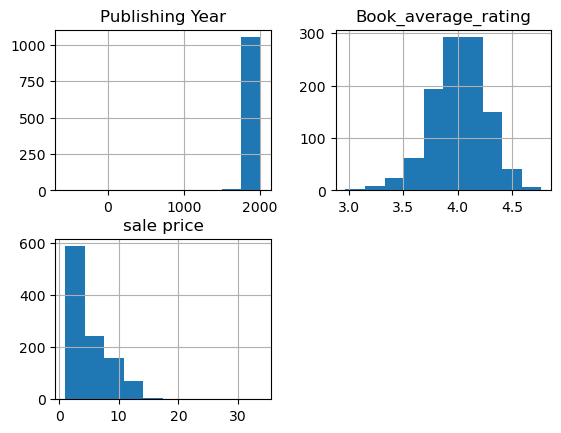

In [10]:
# Visualizing the numeric variables
data.hist(['Publishing Year', 'Book_average_rating', 'sale price'])
plt.show()

<Axes: xlabel='Author_Rating'>

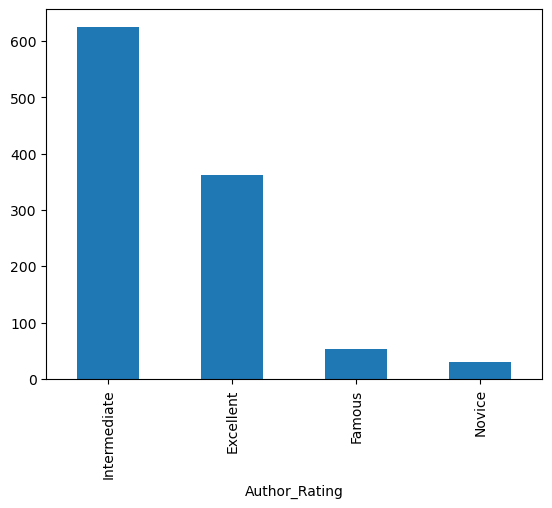

In [11]:
# Visualizing the categorical variables
data["Author_Rating"].value_counts().plot(kind="bar")

<Axes: xlabel='genre'>

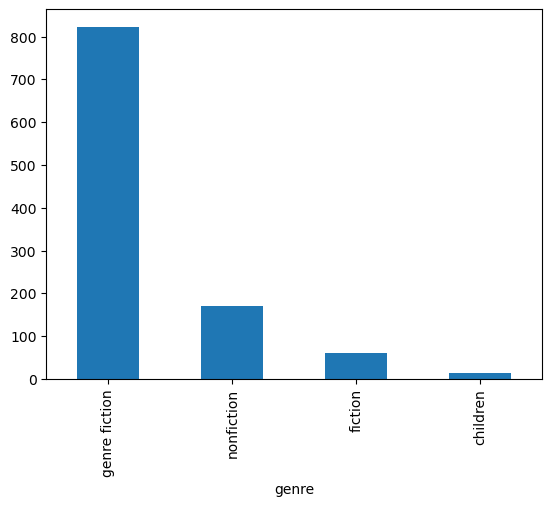

In [12]:
# Visualizing the categorical variables
data["genre"].value_counts().plot(kind="bar")

# Clean/Modify to remove entries not to be analyzed

In [13]:
# Dropping any data that has missing values
data = data.dropna()

In [14]:
# Only keeping entries published during or after 1975
data = data[data["Publishing Year"] >= 1975]

In [15]:
# Only keeping entries published in English language
data = data[data["language_code"].str.contains('en')]

In [16]:
# Modify the genre to combine the entries labeled 'genre fiction' and 'fiction' as just 'fiction'
data["genre_updated"] = np.where(data["genre"] == "genre fiction", "fiction", data["genre"])

In [17]:
# Confirm the process was successful
count_null = data.isna().sum()
print('Number of null or NaN values', count_null)

Number of null or NaN values index                  0
Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
genre_updated          0
dtype: int64


In [18]:
# Quick visualizing to confirm
data.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000
mean,537.028858,2003.122961,4.008432,94459.021330,1796.891267,832.282148,4.821719,614.258469,10183.636136
std,303.693499,9.676030,0.252835,30785.955762,4044.370582,2336.830921,3.516187,363.641308,15677.399325
min,0.000000,1975.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,281.000000,1998.000000,3.850000,70737.000000,357.390000,0.000000,1.990000,304.000000,600.000000
50%,538.000000,2006.000000,4.020000,89468.000000,770.240000,266.112000,3.990000,600.000000,4023.000000
75%,795.000000,2011.000000,4.180000,113066.000000,1429.220000,719.250000,6.990000,921.000000,5616.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,25.890000,1273.000000,61560.000000


In [19]:
data["genre_updated"].unique()

array(['fiction', 'nonfiction', 'children'], dtype=object)

# Exploratory Data Analysis

## Are more recent books sold more often than older books? (Since 1975)

<Axes: xlabel='Publishing Year', ylabel='units sold'>

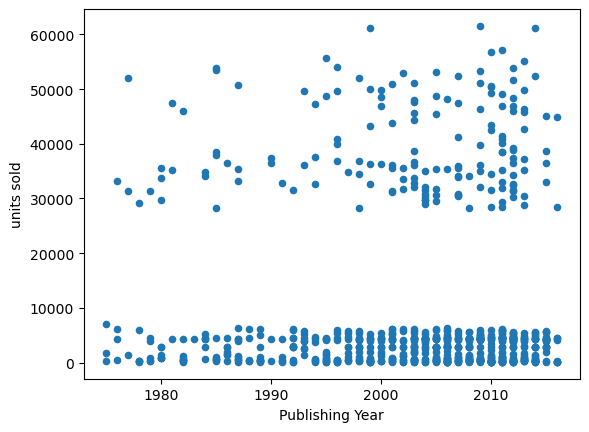

In [20]:
data.plot.scatter(x = "Publishing Year", y = "units sold")

In [21]:
# Conducting pearson correlations to support the findings observed in the visualization
r, p = sp.stats.pearsonr(x=data["Publishing Year"], y=data["units sold"])

print("r = ", round(r,2), "\n" , "p = ", round(p, 3))

r =  -0.01 
 p =  0.806


Observation: It does not, however upon looking at the plot it does inspire us to look into this divide between books which sold more than (and separately, less than) 20,000 copies.

<Axes: xlabel='Publishing Year', ylabel='units sold'>

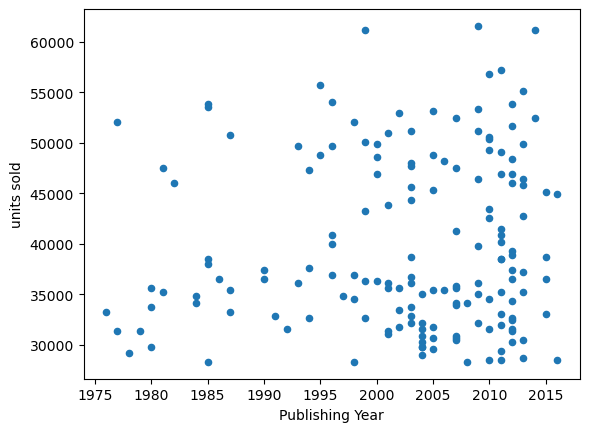

In [22]:
# Let's look at this high-selling entries in a bit more detail
data_high_sellers = data[data["units sold"] > 20000]
data_high_sellers.plot.scatter(x = "Publishing Year", y = "units sold")

In [23]:
# Conducting pearson correlations to support the findings observed in the visualization
r, p = sp.stats.pearsonr(x=data_high_sellers["Publishing Year"], y=data_high_sellers["units sold"])

print("r = ", round(r,2), "\n" , "p = ", round(p, 3))

r =  0.07 
 p =  0.343


<Axes: xlabel='Publishing Year', ylabel='units sold'>

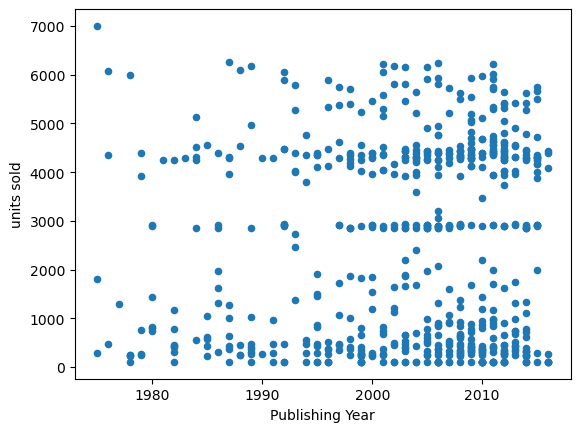

In [24]:
# Now for the low-selling entries in a bit more detail
data_low_sellers = data[data["units sold"] <= 20000]
data_low_sellers.plot.scatter(x = "Publishing Year", y = "units sold")

In [25]:
# Conducting pearson correlations to support the findings observed in the visualization
r, p = sp.stats.pearsonr(x=data_low_sellers["Publishing Year"], y=data_low_sellers["units sold"])

print("r = ", round(r,2), "\n" , "p = ", round(p, 3))

r =  0.08 
 p =  0.044


Observation: It appears there is not a strong relationship between the year and the number of units sold

## Are more highly rated books sold more often than lower-rated books

First let's take a look to make sure that the average ratings are not simply driven by having more ratings provided

<Axes: xlabel='Book_average_rating', ylabel='Book_ratings_count'>

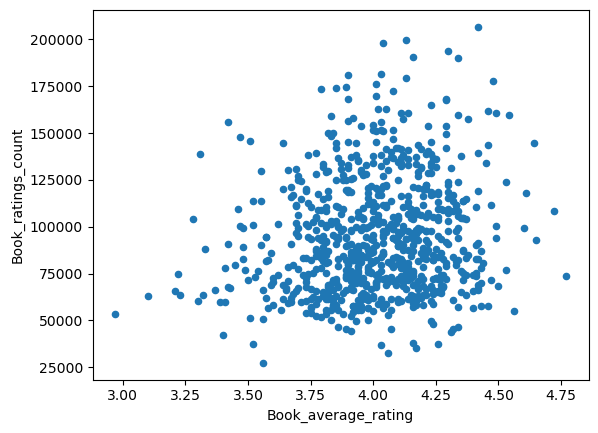

In [26]:
data.plot.scatter(x = "Book_average_rating", y = "Book_ratings_count")

In [27]:
# Conducting pearson correlations to support the findings observed in the visualization
r, p = sp.stats.pearsonr(x=data_low_sellers["Book_average_rating"], y=data_low_sellers["Book_ratings_count"])

print("r = ", round(r,2), "\n" , "p = ", round(p, 3))

r =  0.14 
 p =  0.001


Observation: We'll want to keep in mind that there is a weak relationship here, but we can not conclude any type of causality. For example, perhaps the books that are more highly rated just had more responses because people wanted to show their approval for the book.

## Now we can take a look at a potential relationship between the average book rating and the number of units sold.

<Axes: xlabel='Book_average_rating', ylabel='units sold'>

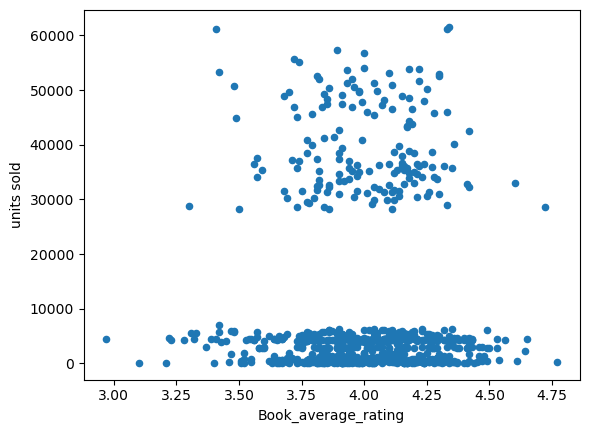

In [28]:
data.plot.scatter(x = "Book_average_rating", y = "units sold")

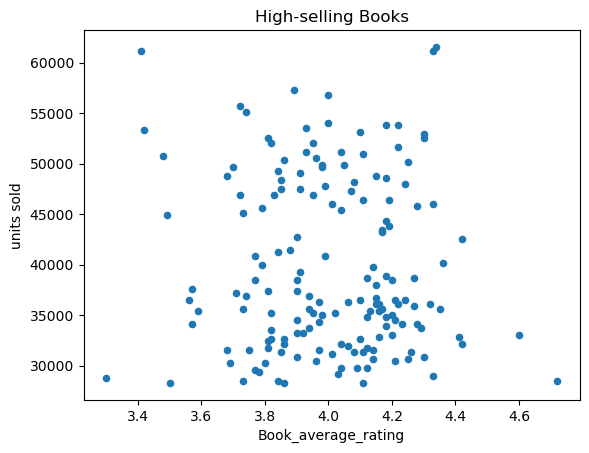

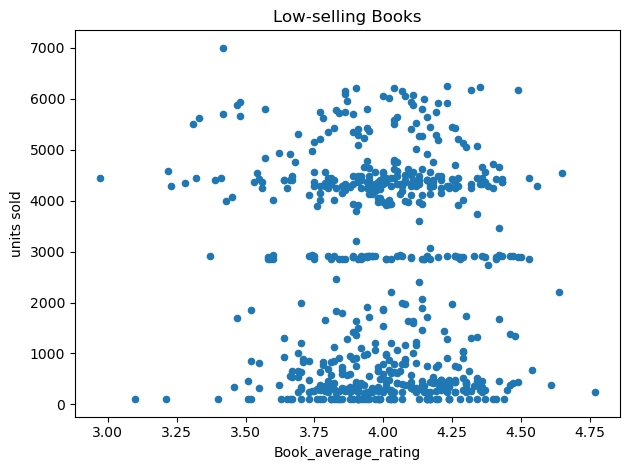

In [29]:
# Let's again separate these out to identify any potential differences
data_high_sellers.plot.scatter(x = "Book_average_rating", y = "units sold")
plt.title('High-selling Books')

data_low_sellers.plot.scatter(x = "Book_average_rating", y = "units sold")
plt.title('Low-selling Books')

plt.tight_layout()

In [30]:
# Conducting pearson correlations to support the findings observed in the visualization
r, p = sp.stats.pearsonr(x=data_high_sellers["Book_average_rating"], y=data_high_sellers["units sold"])

print("High-selling Books:", "\n", "r = ", round(r,2), "\n" , "p = ", round(p, 3))

r, p = sp.stats.pearsonr(x=data_low_sellers["Book_average_rating"], y=data_low_sellers["units sold"])

print("Low-selling Books:", "\n", "r = ", round(r,2), "\n" , "p = ", round(p, 3))

High-selling Books: 
 r =  -0.06 
 p =  0.43
Low-selling Books: 
 r =  -0.05 
 p =  0.188


## Perhaps the sale price might have an influence on the sales. Are cheaper books sold more often than more expensive books?

<Axes: xlabel='sale price', ylabel='units sold'>

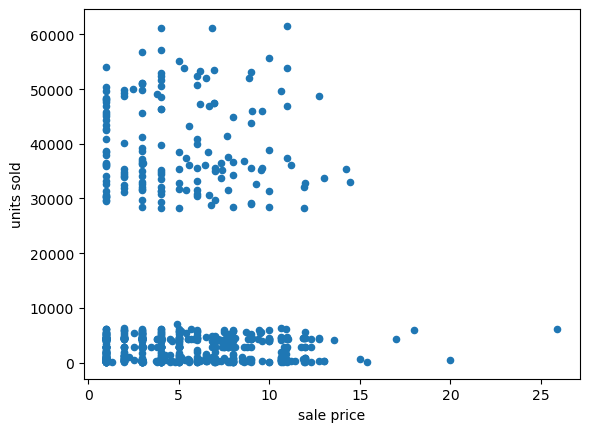

In [31]:
data.plot.scatter(x = "sale price", y = "units sold")

In [32]:
# Conducting pearson correlations to support the findings observed in the visualization
r, p = sp.stats.pearsonr(x=data["sale price"], y=data["units sold"])

print("r = ", round(r,2), "\n" , "p = ", round(p, 3))

r =  0.02 
 p =  0.652


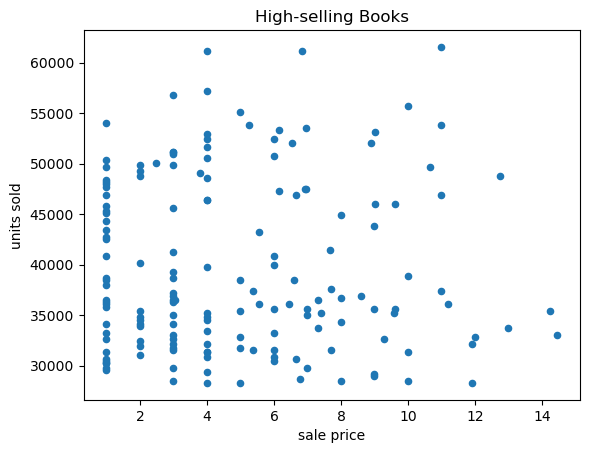

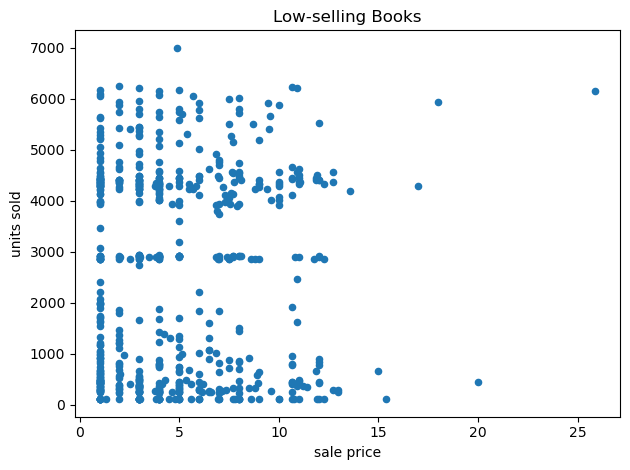

In [33]:
data_high_sellers.plot.scatter(x = "sale price", y = "units sold")
plt.title('High-selling Books')

data_low_sellers.plot.scatter(x = "sale price", y = "units sold")
plt.title('Low-selling Books')

plt.tight_layout()

In [34]:
# Conducting pearson correlations to support the findings observed in the visualization
r, p = sp.stats.pearsonr(x=data_high_sellers["sale price"], y=data_high_sellers["units sold"])

print("High-selling Books:", "\n", "r = ", round(r,2), "\n" , "p = ", round(p, 3))

r, p = sp.stats.pearsonr(x=data_low_sellers["sale price"], y=data_low_sellers["units sold"])

print("Low-selling Books:", "\n", "r = ", round(r,2), "\n" , "p = ", round(p, 3))

High-selling Books: 
 r =  -0.01 
 p =  0.902
Low-selling Books: 
 r =  0.05 
 p =  0.256


# Let's turn our attention to some of the categorical data

## Does the author's reputation (as measured by their rating) result in more sales?

<Axes: xlabel='Author_Rating'>

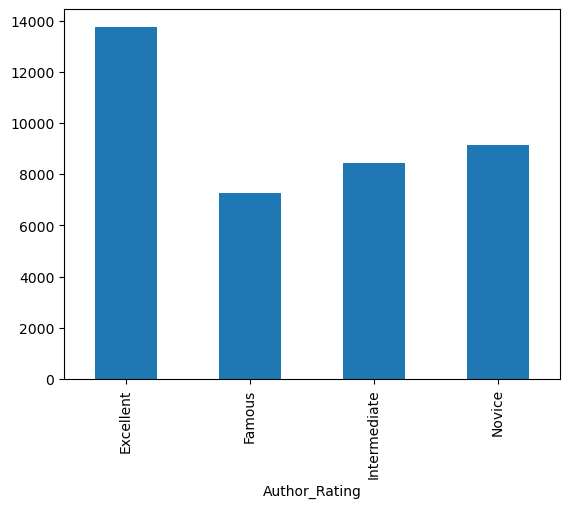

In [35]:
data.groupby("Author_Rating")["units sold"].mean().plot.bar()

Observation: Interesting! On average, the famours authors didn't sell the most books. Instead, the higher-rated authors sold more than the famous.

## This inspires an interesting question, is there a difference in book ratings between these different ratings of the authors?

<Axes: xlabel='Author_Rating'>

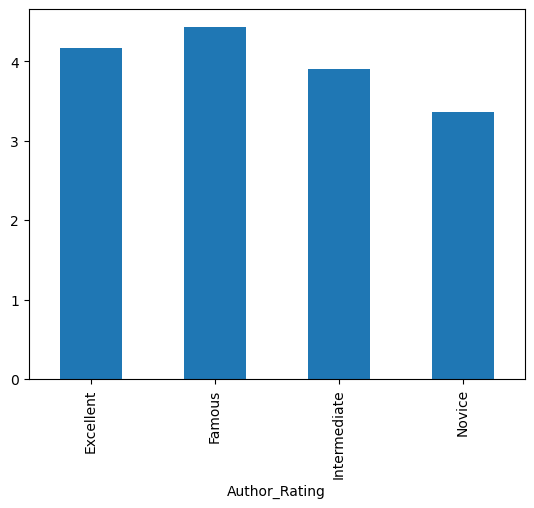

In [36]:
data.groupby("Author_Rating")["Book_average_rating"].mean().plot.bar()

Observation: Again, interesting! Famous authors' books appear to be rated the highest, however that does not translate to more sales.

# We can also look at the type of books (genres) that are sold most often, though since we only have these 3 categories we'll most likely want to stock some of each in the store.

<Axes: xlabel='genre_updated'>

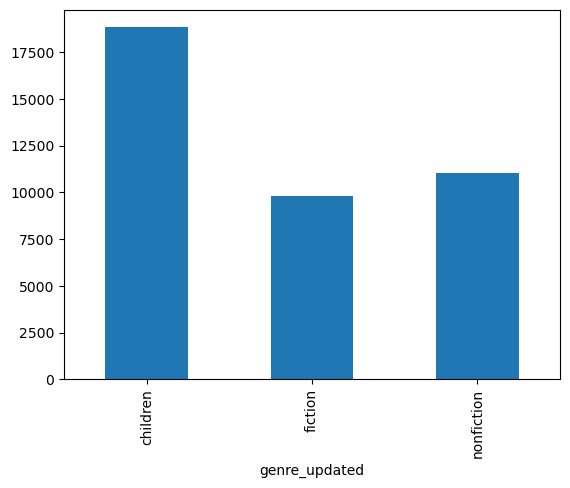

In [37]:
data.groupby("genre_updated")["units sold"].mean().plot.bar()

Observation: Children's books sold, on average, the most often compared to fiction and nonfiction books.

# Recommendations

- While it may be tempting to want to stock the store with 'famous' authors, this analysis suggests that you should aim to stock your store with authors who are considered 'excellent', rather than simply well-known.
- You may want to consider having a larger 'children books' section than you had originaly been planning. 
- This analysis examined what I will describe as 'modern' books, so we did not look at any published before 1975.
- Further exploration should be considered to better understand the stark divide between the high-selling and low-selling books. For example, I would consider a logistic regression or classification model that could predict whether or not a book would be in the high- or low-selling group based on some of the features present in the dataset.
- Additionally, explore intersectionality more. Does the trend of higher-selling 'excellent' authors persist within the different genres of books, too?

# Exploratory for future analyses

## Better understanding of income

In [38]:
# Calculating a new variable to be used in our analyses
# our_income_per_unit: the amount of income we get when each book is sold
# To calculate this, we first subtract the 'publisher revenue' from the 'gross sales' and then divide by number of units sold
data["our_income_per_unit"] = (data["gross sales"] - data["publisher revenue"]) / data["units sold"]

# Then let's split this up for our high- and low-selling datasets again (with this new variable)
data_high_sellers = data[data["units sold"] > 20000]
data_low_sellers = data[data["units sold"] <= 20000]

# Quick visualizing to confirm
data.head()


,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,genre_updated,our_income_per_unit
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,fiction,1.952
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,fiction,0.796
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,fiction,3.476
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500,fiction,3.000
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750,fiction,3.196


# Is there a relationship between the number of books sold and how much income we would make from selling them?

<Axes: xlabel='units sold', ylabel='our_income_per_unit'>

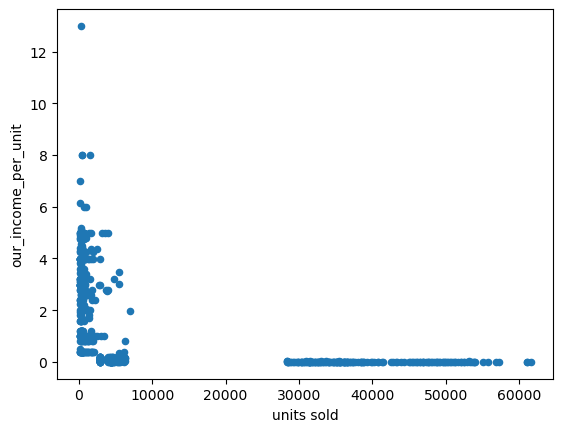

In [39]:
data.plot.scatter(x = "units sold", y = "our_income_per_unit")

In [40]:
# Conducting pearson correlations to support the findings observed in the visualization
r, p = sp.stats.pearsonr(x=data["units sold"], y=data["our_income_per_unit"])

print("r = ", round(r,2), "\n" , "p = ", round(p, 3))

r =  -0.38 
 p =  0.0


Observation: This might be something to consider! The books that are selling the best do not result in the highest incomes for us (per book), but, they are still bringing in customers to the store, so that is important!

Text(0.5, 1.0, 'Low-selling Books')

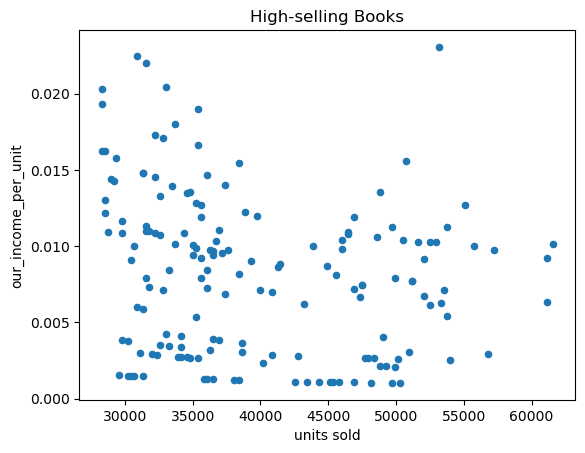

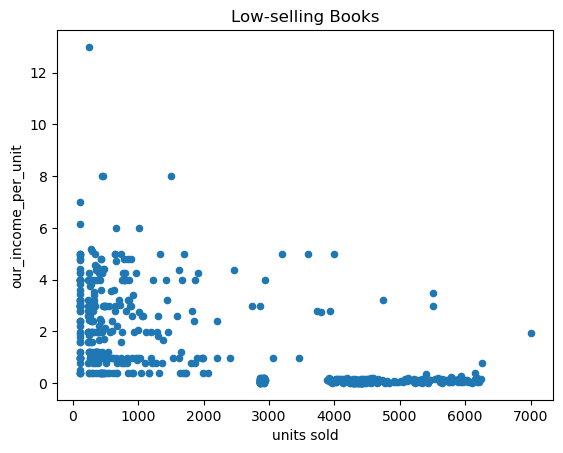

In [41]:
data_high_sellers.plot.scatter(x = "units sold", y = "our_income_per_unit")
plt.title('High-selling Books')

data_low_sellers.plot.scatter(x = "units sold", y = "our_income_per_unit")
plt.title('Low-selling Books')

In [42]:
# Conducting pearson correlations to support the findings observed in the visualization
r, p = sp.stats.pearsonr(x=data_high_sellers["units sold"], y=data_high_sellers["our_income_per_unit"])

print("High-selling Books:", "\n", "r = ", round(r,2), "\n" , "p = ", round(p, 3))

r, p = sp.stats.pearsonr(x=data_low_sellers["units sold"], y=data_low_sellers["our_income_per_unit"])

print("Low-selling Books:", "\n", "r = ", round(r,2), "\n" , "p = ", round(p, 3))

High-selling Books: 
 r =  -0.21 
 p =  0.007
Low-selling Books: 
 r =  -0.63 
 p =  0.0


Observation: This trend seems to persist within both the high- and low-selling books.